<a href="https://colab.research.google.com/github/nastosimys/Machine_learning/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашняя работа №1.**

**0. Описание задачи**

Таблица содержит данные о 100000 людей. Для каждого человека указаны его возраст, пол, место проживания, раса, история курения, индекс массы тела, уровень сахара и глюкозы в крови, наличие гипертонии, сердечно-сосудистых заболеваний и диабета. Требуется постороить модель классификации, которая будет предсказывать наличие диабета.

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

**1. Чтение данных**

In [75]:
url = 'https://raw.githubusercontent.com/nastosimys/Machine_learning/refs/heads/main/diabetes_dataset.csv'
data_raw = pd.read_csv(url)
data_raw.replace("No Info", np.nan, inplace=True)
data_raw.replace("Other", np.nan, inplace=True)

Найдём размеры таблицы: количество строк (каждая строка соответствует одному человеку) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [76]:
data_raw.shape

(100000, 16)

In [77]:
data_raw

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,NaN,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


Обобщённая информация о данных:

In [61]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                99982 non-null   object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       64184 non-null   object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

Столбцы (признаки) имеют имена:

* `year` - год сбора данных
* `gender` - пол человека
* `age` - возраст человека (в годах)
* `location` - штат или регион, в котором проживает человек
* `race:AfricanAmerican` - является ли человек афроамериканцем (0 - нет, 1 - есть)
* `race:Asian` - принадлежность к монголоидной расе (0 - нет, 1 - есть)
* `race:Caucasian` - принадлежность к европеоидной расе (0 - нет, 1 - есть)
* `race:Hispanic` - является ли человек латиноамериканцем (0 - нет, 1 - есть)
* `race:Other` - другая расовая принадлежность (0 - нет, 1 - есть)
* `hypertension` - наличие гипертонии (0 - нет, 1 - есть)
* `heart_disease` - наличие сердечных заболеваний (0 - нет, 1 - есть)
* `smoking_history` - история курения человека
* `bmi` - индекс массы тела человека
* `hbA1c_level` - уровень HbA1c (показатель уровня сахара в крови с течением времени)
* `blood_glucose_level` - уровень глюкозы в крови (в мг/дл)
* `diabetes` - наличие у человека диабета (0 - нет, 1 - есть)


Признаки `gender`, `location` и `smoking_history` - категориальные, остальные признаки - числовые.

In [6]:
data_raw['gender'] = data_raw['gender'].astype('category')
data_raw['location'] = data_raw['location'].astype('category')
data_raw['smoking_history'] = data_raw['smoking_history'].astype('category')

In [7]:
data_raw['gender'].dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False, categories_dtype=object)

In [8]:
data_raw['location'].dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware',
                  'District of Columbia', 'Florida', 'Georgia', 'Guam',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'United States',
                  'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
                  'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

In [9]:
data_raw['smoking_history'].dtype

CategoricalDtype(categories=['current', 'ever', 'former', 'never', 'not current'], ordered=False, categories_dtype=object)

**2. Визуализация данных и вычисление основных характеристик**

Информация о числовых признаках:

In [10]:
data_raw.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Метод `data_raw.describe()` используется для получения сводной информации о числовых признаках.

* `count` - количество значений
* `mean` - среднее значение
* `std` - разброс по этим значениям
* `min` - минимальное значение
* `25%` - первый квартиль
* `50%` - второй квартиль (медиана)
* `75%` - третий квартиль
* `max` - максимальное значение

Информация о категориальных признаках:

In [11]:
data_raw.describe(include=['category'])

,gender,location,smoking_history
count,99982,100000,64184
unique,2,55,5
top,Female,Iowa,never
freq,58552,2038,35095


Метод `data_raw.describe(include=['category'])` используется для получения информации о категориальных признаках.

* `count` - количество значений
* `unique` - количество значений, которое принимает переменная
* `top` - мода (самое распространённое значение)
* `freq` - количество объектов с самым частым значением

Визуализация:

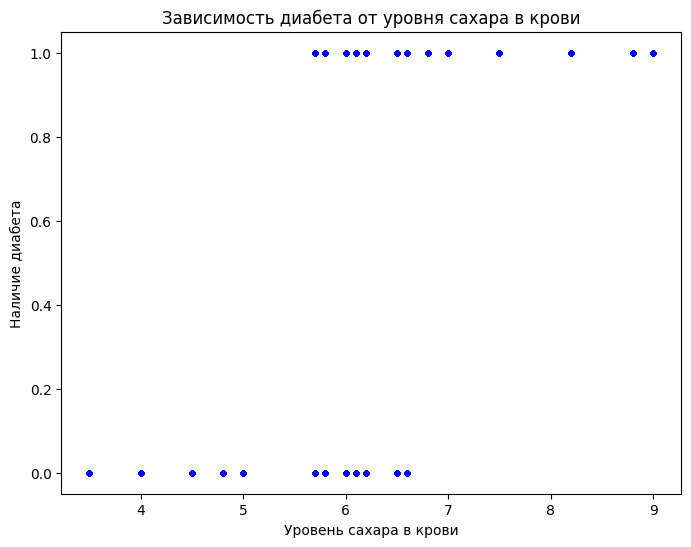

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(data_raw['hbA1c_level'], data_raw['diabetes'], s=8, c='blue')
plt.xlabel('Уровень сахара в крови')
plt.ylabel('Наличие диабета')
plt.title('Зависимость диабета от уровня сахара в крови')
plt.show()

Чем выше уровень сахара в крови, тем вероятнее наличие диабета.

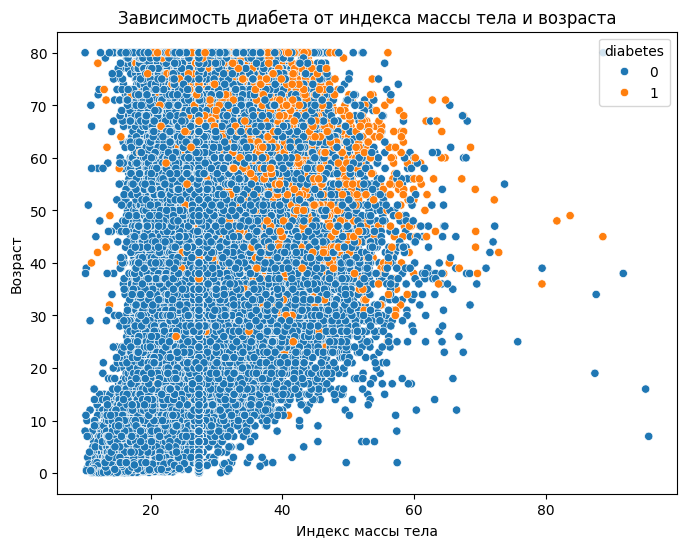

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='age', hue='diabetes', data=data_raw)
plt.xlabel('Индекс массы тела')
plt.ylabel('Возраст')
plt.title('Зависимость диабета от индекса массы тела и возраста')
pass

Чем больше возраст и индекс массы тела, тем больше вероятность наличия диабета.

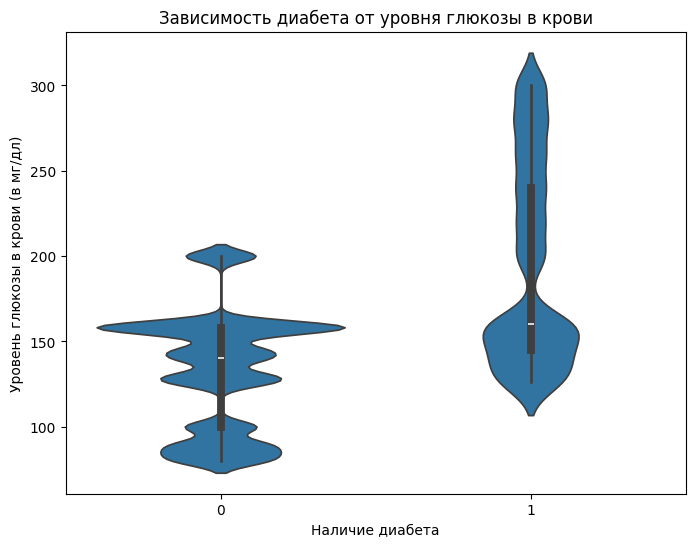

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="diabetes", y="blood_glucose_level", data=data_raw)
plt.xlabel('Наличие диабета')
plt.ylabel('Уровень глюкозы в крови (в мг/дл)')
plt.title('Зависимость диабета от уровня глюкозы в крови')
pass

Чем больше уровень глюкозы в крови, тем выше вероятность наличия диабета.

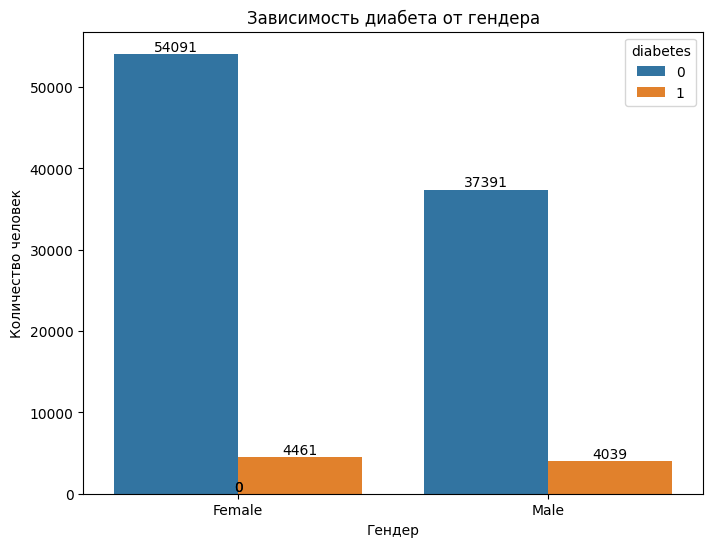

In [14]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', hue='diabetes', data=data_raw)
plt.xlabel('Гендер')
plt.ylabel('Количество человек')
plt.title('Зависимость диабета от гендера')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.0f}'.format(height),
            ha='center', va='bottom')
pass

Среди опрошенных женщин диабетом больны 7,6%, среди мужчин - 9,75%.

Все диаграммы рассеивания:

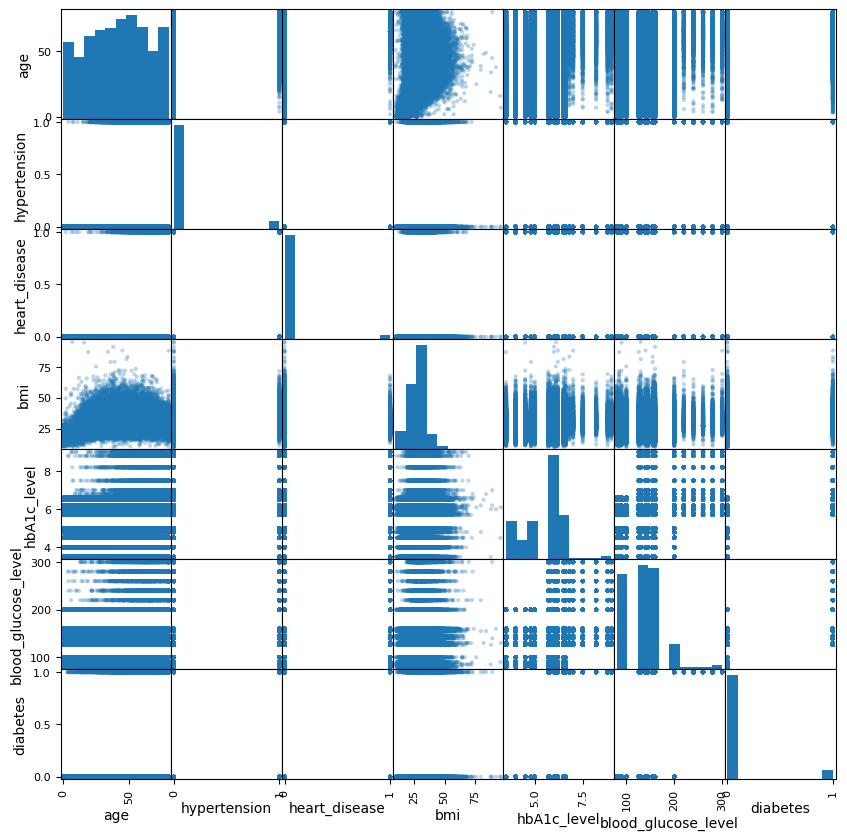

In [15]:
pd.plotting.scatter_matrix(data_raw[['age', 'hypertension', 'heart_disease', 'bmi',	'hbA1c_level',	'blood_glucose_level',	'diabetes']], alpha=.3, figsize=(10, 10))
plt.show()

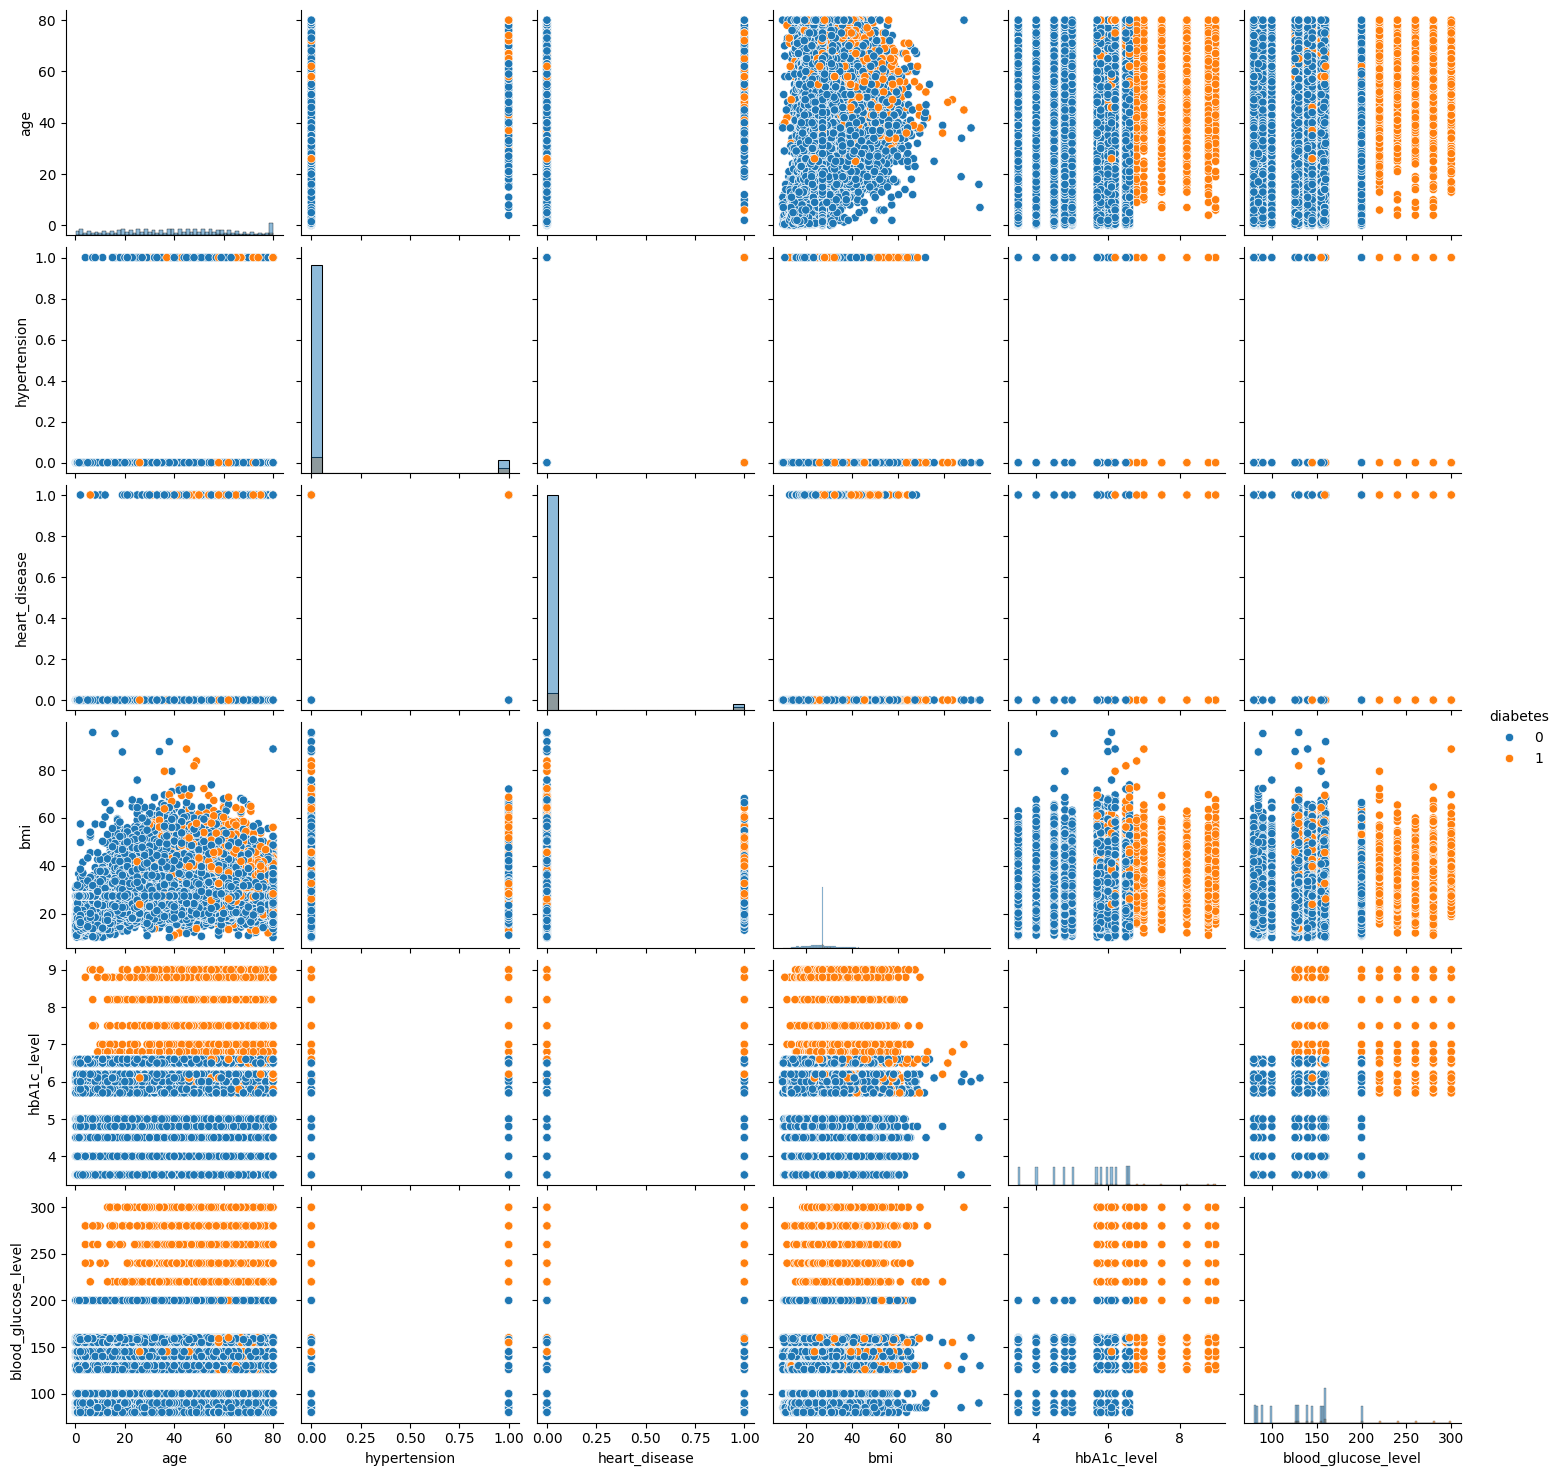

In [ ]:
sns.pairplot(data_raw[['age', 'hypertension', 'heart_disease', 'bmi',	'hbA1c_level',	'blood_glucose_level',	'diabetes']], hue='diabetes', diag_kind='hist')
pass

Оранжевым цветом выделено наличие диабета, синим - его отсутствие.

Ящик с усами (бокс-диаграмма) и квартиль:

Ящик с усами (бокс-диаграмма) - один из способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-ому и 3-ему квартилям, а горизонтальная линия внутри ящика - медиане. Значения за пределами усов изображаются в виде отдельных точек. Их можно считать выбросами.

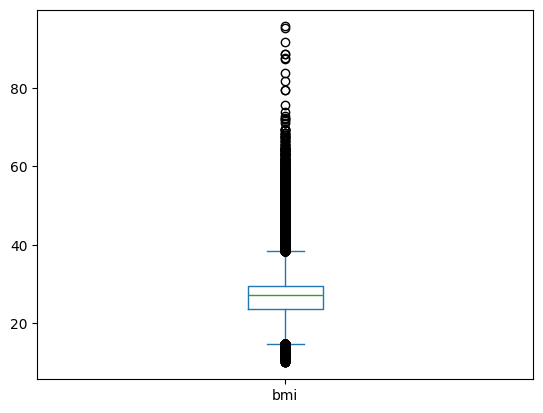

In [16]:
data_raw['bmi'].plot(kind='box')
pass

In [17]:
data_raw['bmi'].quantile([0.005, .01, .05, .1, .5, .9, .95, .99, .995])

,bmi
0.005,13.8900
0.010,14.6000
0.050,16.8200
0.100,19.1800
0.500,27.3200
0.900,35.4700
0.950,39.4900
0.990,48.7901
0.995,52.5000


99% всех значений признака `'bmi'` находится в диапазоне от 13.89 до 52.2.

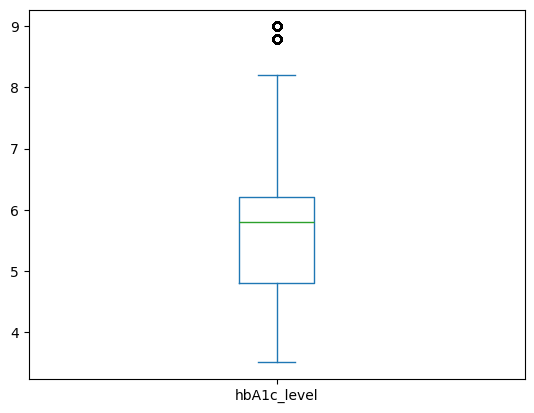

In [18]:
data_raw['hbA1c_level'].plot(kind='box')
pass

In [19]:
data_raw['hbA1c_level'].quantile([0.005, .01, .05, .1, .5, .9, .95, .99, .995])

,hbA1c_level
0.005,3.5
0.010,3.5
0.050,3.5
0.100,4.0
0.500,5.8
0.900,6.6
0.950,6.6
0.990,8.8
0.995,9.0


99% всех значений признака `'hbA1c_level'` находится в диапазоне от 3.5 до 9.

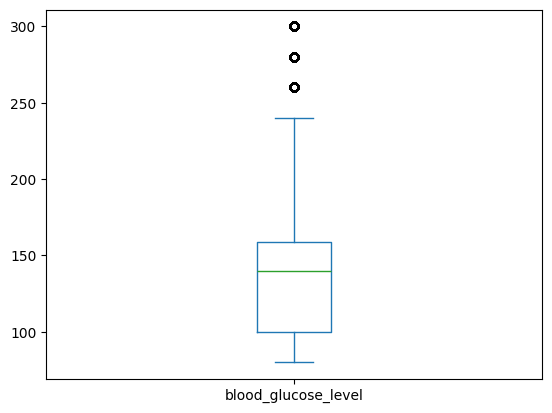

In [20]:
data_raw['blood_glucose_level'].plot(kind='box')
pass

In [21]:
data_raw['blood_glucose_level'].quantile([0.005, .01, .05, .1, .5, .9, .95, .99, .995])

,blood_glucose_level
0.005,80.0
0.010,80.0
0.050,80.0
0.100,85.0
0.500,140.0
0.900,200.0
0.950,200.0
0.990,280.0
0.995,300.0


99% всех значений признака `'blood_glucose_level'` находится в диапазоне от 80 до 300 мг/дл.

In [22]:
data_raw['smoking_history'].value_counts()

,count
smoking_history,
never,35095
former,9352
current,9286
not current,6447
ever,4004


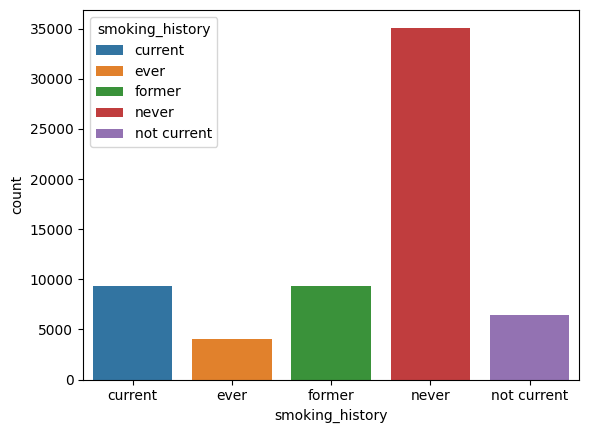

In [23]:
sns.countplot(x='smoking_history', data=data_raw, hue='smoking_history')
pass

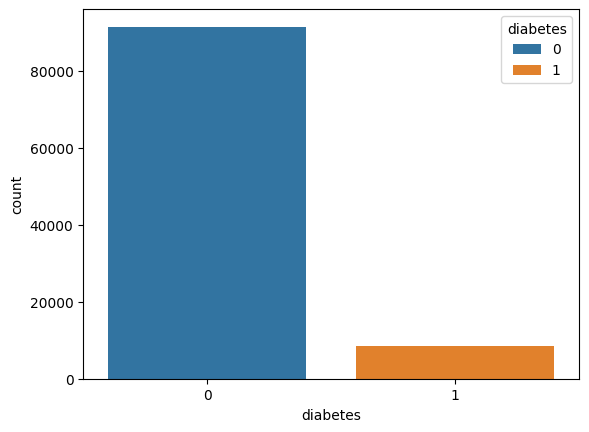

In [24]:
sns.countplot(x='diabetes', data=data_raw, hue='diabetes')
pass

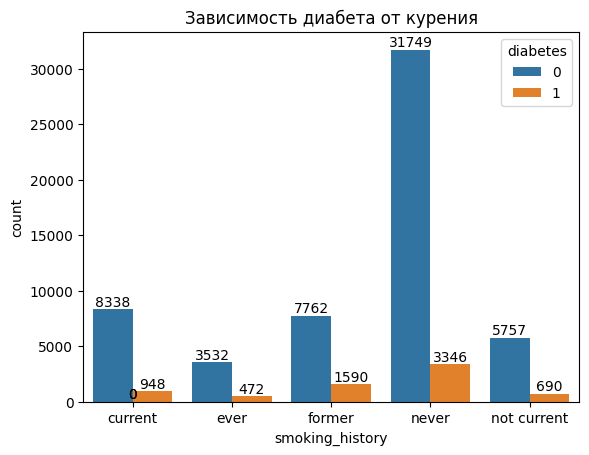

In [25]:
ax = sns.countplot(x='smoking_history', hue='diabetes', data=data_raw)
plt.title('Зависимость диабета от курения')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.0f}'.format(height),
            ha='center', va='bottom')
pass

Из графика можно сделать вывод, что диабет от курения не зависит.

Интересно также исследовать, есть ли зависимость между расой человека и наличием у него диабета.

In [62]:
data = data_raw
data['race:AfricanAmerican'] = data['race:AfricanAmerican'].replace({1: 'AfricanAmerican'})
data['race:Asian'] = data['race:Asian'].replace({1: 'Asian'})
data['race:Caucasian'] = data['race:Caucasian'].replace({1: 'Caucasian'})
data['race:Hispanic'] = data['race:Hispanic'].replace({1: 'Hispanic'})
data['race:Other'] = data['race:Other'].replace({1: 'Other'})
data['race'] = data.apply(lambda row: row['race:AfricanAmerican'] if row['race:AfricanAmerican'] != 0 else
                                     row['race:Asian'] if row['race:Asian'] != 0 else
                                     row['race:Caucasian'] if row['race:Caucasian'] != 0 else
                                     row['race:Hispanic'] if row['race:Hispanic'] != 0 else
                                     row['race:Other'], axis=1)
data = data.drop('race:Other', axis=1)
data = data.drop('race:Hispanic', axis=1)
data = data.drop('race:Caucasian', axis=1)
data = data.drop('race:Asian', axis=1)
data['race:AfricanAmerican'] = data['race']
data = data.drop('race', axis=1)
data = data.rename(columns={'race:AfricanAmerican': 'race'})

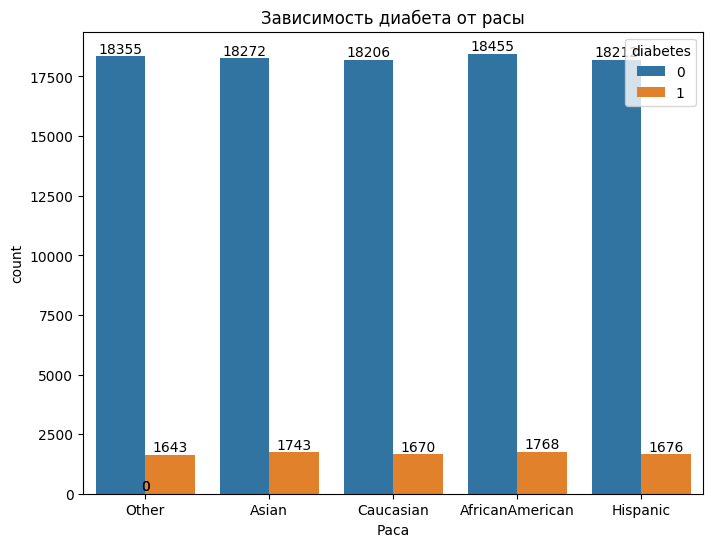

In [63]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='race', hue='diabetes', data=data)
plt.xlabel('Раса')
plt.title('Зависимость диабета от расы')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.0f}'.format(height),
            ha='center', va='bottom')
pass

Из исследуемых людей диабет есть у 8.7% азиатов, у 8.4% представителей европеоидной расы, у 8.74% афроамериканцев и у 8.4% латиноамериканцев.

Так как значения практически равны, можно сделать вывод, что раса не оказывает значительного влияния на предрасположенность к диабету.

Матрица корреляций:

Матрица корреляции показывает, как линейно зависимы друг от друга различные переменные в наборе данных.

Корреляция находится в диапазоне от -1 до +1.

* +1:  Полная положительная корреляция. Две переменные изменяются в одном направлении.
* 0: Отсутствие корреляции. Изменения в одной переменной не влияют на изменения в другой.
* -1: Полная отрицательная корреляция. Две переменные изменяются в противоположных направлениях.


In [32]:
data2 = data_raw
data2 = data2.drop(['year', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other'], axis=1)

In [33]:
corr_mat = data2.corr(numeric_only=True)
corr_mat

,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
hbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


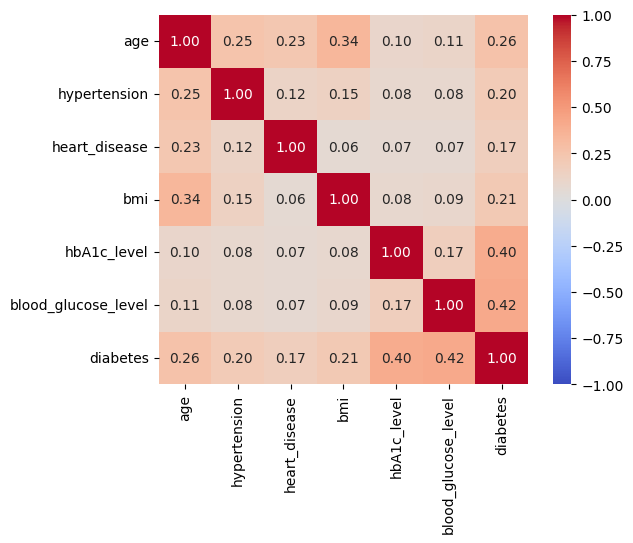

In [34]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, которые больше или равны 0.4:

In [35]:
corr_mat >= 0.4

,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
age,True,False,False,False,False,False,False
hypertension,False,True,False,False,False,False,False
heart_disease,False,False,True,False,False,False,False
bmi,False,False,False,True,False,False,False
hbA1c_level,False,False,False,False,True,False,True
blood_glucose_level,False,False,False,False,False,True,True
diabetes,False,False,False,False,True,True,True


In [36]:
corr_mat.where(np.triu(np.abs(corr_mat) >= 0.4, k=1)).stack().sort_values(ascending=False)

,,0
blood_glucose_level,diabetes,0.419558
hbA1c_level,diabetes,0.400660


Можно сделать вывод, что больше всего наличие диабета зависит от уровня сахара и уровня глюкозы в крови.


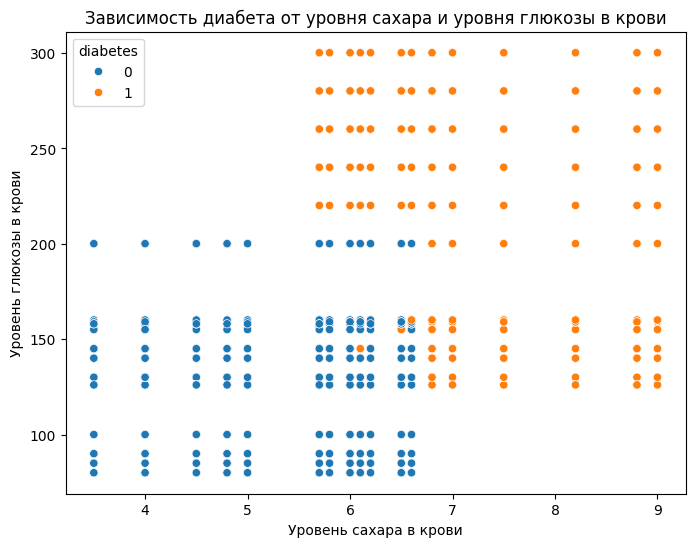

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hbA1c_level', y='blood_glucose_level', hue='diabetes', data=data_raw, alpha=1)
plt.xlabel('Уровень сахара в крови')
plt.ylabel('Уровень глюкозы в крови')
plt.title('Зависимость диабета от уровня сахара и уровня глюкозы в крови')
pass

Меньше всего наличие диабета зависит от гипертонии и сердечно-сосудистых заболеваний.

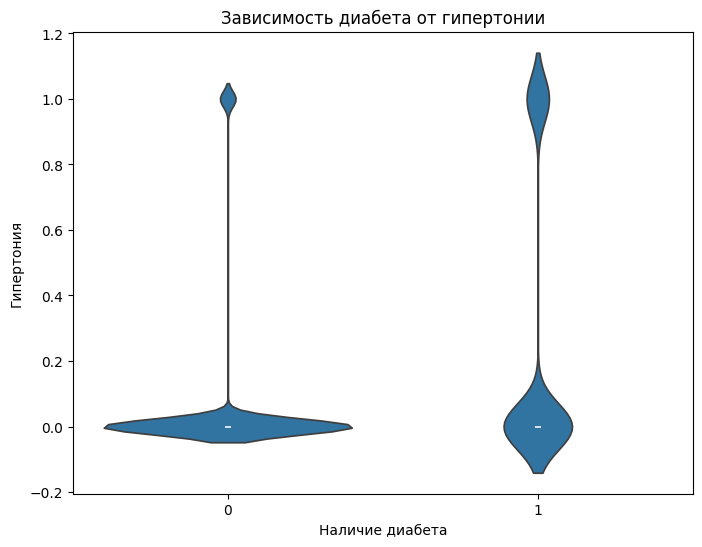

In [38]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='diabetes', y='hypertension', data=data_raw)
plt.ylabel('Гипертония')
plt.xlabel('Наличие диабета')
plt.title('Зависимость диабета от гипертонии')
pass

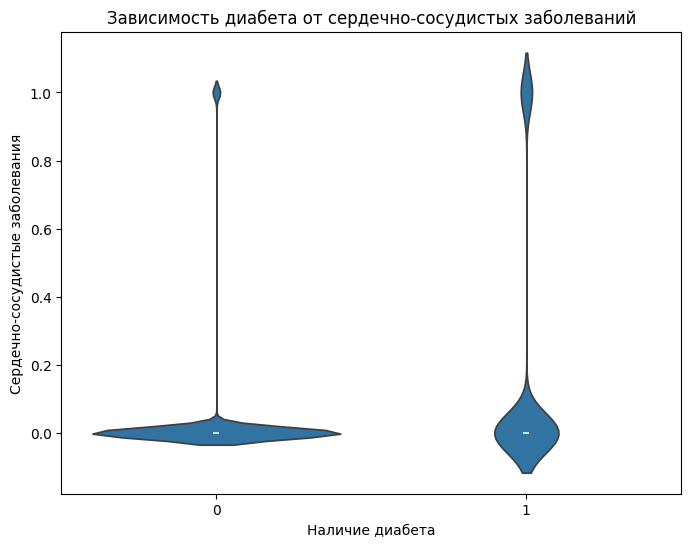

In [39]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='diabetes', y='heart_disease', data=data_raw)
plt.ylabel('Сердечно-сосудистые заболевания')
plt.xlabel('Наличие диабета')
plt.title('Зависимость диабета от сердечно-сосудистых заболеваний')
pass

In [40]:
corr_mat.loc['diabetes', 'hypertension'], corr_mat.loc['diabetes', 'heart_disease']

(0.1978232464080493, 0.17172684954884787)

Также можно заметить зависимость индекса массы тела от возраста.

In [41]:
corr_mat.loc['bmi', 'age']

0.33739577618616956

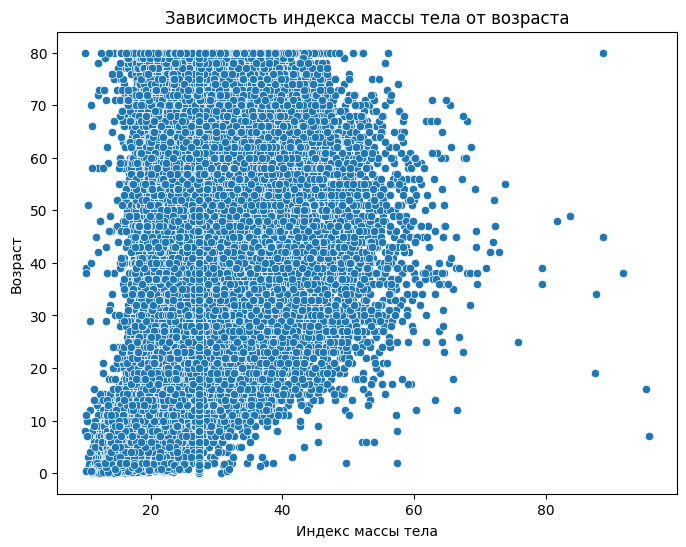

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='age', data=data_raw, alpha=1)
plt.xlabel('Индекс массы тела')
plt.ylabel('Возраст')
plt.title('Зависимость индекса массы тела от возраста')
pass

**3. Обработка пропущенных значений**

In [78]:
data_raw.isnull()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Количество пропущенных значений:

In [79]:
data_raw.isnull().sum()

,0
year,0
gender,18
age,0
location,0
race:AfricanAmerican,0
race:Asian,0
race:Caucasian,0
race:Hispanic,0
race:Other,0
hypertension,0


Названия столбцов, в которых есть пропущенные значения:

In [80]:
[feature for feature in data_raw.columns if data_raw[feature].isnull().sum() > 0]

['gender', 'smoking_history']

Пропущенные значения можно заполнить медианой или средним (для количественных признаков) или модой (для номинальных признаков).

Так как `'gender'` и `'smoking_history'` это катигориальные признаки, то заполняем их модой:

In [81]:
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(data_raw[['gender', 'smoking_history']])

SimpleImputer(strategy='most_frequent')

In [82]:
data_raw[['gender', 'smoking_history']] = imp_cat.transform(data_raw[['gender', 'smoking_history']])

Теперь можно убедиться, что пропущенных значений нет:

In [83]:
data_raw.isna().sum()

,0
year,0
gender,0
age,0
location,0
race:AfricanAmerican,0
race:Asian,0
race:Caucasian,0
race:Hispanic,0
race:Other,0
hypertension,0


**4. Обработка категориальных признаков**

Обработка:

Бинарный признак `'gender'` можно заменить на числовой: `'Male'` -> 0, `'Female'` -> 1.

Признак `'smoking_history'` принимает 5 значений: `'current'`, `'ever'`, `'former'`, `'never'`, `'not current'`.

Можно заменить признак `'smoking_history'` на 5 новых признаков, которые будут называться `'smoking_history_current'`, `'smoking_history_ever'`, `'smoking_history_former'`, `'smoking_history_never'`, `'smoking_history_not_current'`. При этом
- если признак `'smoking_history'` принимает значение `'current'`, то признак `'smoking_history_current'` равен 1, а все остальные 0;
- если признак `'smoking_history'` принимает значение `'ever'`, то признак `'smoking_history_ever'` равен 1, а все остальные 0
- и т.д.

In [84]:
data_raw['gender'] = data_raw['gender'].map({'Female': 1, 'Male': 0})
data_raw['gender']

,gender
0,1
1,1
2,0
3,0
4,1
...,...
99995,1
99996,1
99997,0
99998,1


In [85]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
data_raw_smoking = pd.DataFrame(data_raw['smoking_history'])
enc.fit(data_raw_smoking)

OneHotEncoder(drop='if_binary', sparse_output=False)

In [86]:
dummies = pd.DataFrame(enc.transform(data_raw_smoking),
                       columns=enc.get_feature_names_out(), index=data_raw.index)
dummies.head()

,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [87]:
data_raw = pd.concat((data_raw, dummies), axis=1).drop('smoking_history', axis=1)
data_raw = data_raw.rename(columns={'smoking_history_not current': 'smoking_history_not_current'})
data_raw

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not_current
0,2020,1,32.0,Alabama,0,0,0,0,1,0,0,27.32,5.0,100,0,0.0,0.0,0.0,1.0,0.0
1,2015,1,29.0,Alabama,0,1,0,0,0,0,0,19.95,5.0,90,0,0.0,0.0,0.0,1.0,0.0
2,2015,0,18.0,Alabama,0,0,0,0,1,0,0,23.76,4.8,160,0,0.0,0.0,0.0,1.0,0.0
3,2015,0,41.0,Alabama,0,0,1,0,0,0,0,27.32,4.0,159,0,0.0,0.0,0.0,1.0,0.0
4,2016,1,52.0,Alabama,1,0,0,0,0,0,0,23.75,6.5,90,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,1,33.0,Wyoming,0,0,0,0,1,0,0,21.21,6.5,90,0,0.0,0.0,0.0,1.0,0.0
99996,2016,1,80.0,Wyoming,0,1,0,0,0,0,0,36.66,5.7,100,0,0.0,0.0,0.0,1.0,0.0
99997,2018,0,46.0,Wyoming,0,1,0,0,0,0,0,36.12,6.2,158,0,0.0,1.0,0.0,0.0,0.0
99998,2018,1,51.0,Wyoming,1,0,0,0,0,0,0,29.29,6.0,155,0,0.0,0.0,0.0,0.0,1.0


**5. Нормализация**

Выполним стандартизацию всех признаков:

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#data_raw = data_raw.drop('location', axis=1)
norm_data = data_raw[['year', 'age', 'bmi', 'hbA1c_level', 'blood_glucose_level']]
scaler = StandardScaler()
scaler.fit(norm_data)
norm_data = pd.DataFrame(scaler.transform(norm_data), columns=norm_data.columns, index=norm_data.index)

In [89]:
norm_data.describe()

,year,age,bmi,hbA1c_level,blood_glucose_level
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,-7.685458e-14,-1.743672e-16,8.993339e-16,-2.842171e-18,-2.827250e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.498320e+00,-1.856658e+00,-2.608320e+00,-1.893686e+00,-1.426210e+00
25%,4.751448e-01,-7.943364e-01,-5.561106e-01,-6.794897e-01,-9.349053e-01
50%,4.751448e-01,4.948073e-02,-1.155837e-04,2.545078e-01,4.770422e-02
75%,4.751448e-01,8.044750e-01,3.404125e-01,6.281067e-01,5.144437e-01
max,2.705244e+00,1.692704e+00,1.030161e+01,3.243300e+00,3.978142e+00


**6. Разбиение данных на обучающую и тестовую выборки**

Для предсказания диабета буду использовать все входные признаки, кроме year.

In [90]:
X = data_raw.drop(['diabetes', 'year', 'location'], axis=1)
y = data_raw['diabetes']

In [91]:
type(X)

pandas.core.frame.DataFrame

In [92]:
type(y)

pandas.core.series.Series

Разбиваем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, d = X_train.shape
N_test,  d = X_test.shape

N_train, N_test, d

(75000, 25000, 17)

**7. Обучение**

Метод k ближайших соседей (kNN):

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
accuracy_train = knn.score(X_train, y_train)
print(f"Точность модели на обучающей выборке: {accuracy_train}")
err_train = 1 - accuracy_train
print(f"Ошибка на обучающей выборке: {err_train}")
accuracy_test = knn.score(X_test, y_test)
print(f"Точность модели на тестовой выборке: {accuracy_test}")
err_test = 1 - accuracy_test
print(f"Ошибка на тестовой выборке: {err_test}")

Точность модели на обучающей выборке: 0.9628533333333333
Ошибка на обучающей выборке: 0.03714666666666666
Точность модели на тестовой выборке: 0.95456
Ошибка на тестовой выборке: 0.045440000000000036


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Лучшее значение k: {best_k}")

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
accuracy_train = best_knn.score(X_train, y_train)
print(f"Точность модели на обучающей выборке: {accuracy_train}")
err_train = 1 - accuracy_train
print(f"Ошибка на обучающей выборке: {err_train}")
accuracy_test = best_knn.score(X_test, y_test)
print(f"Точность модели на тестовой выборке: {accuracy_test}")
err_test = 1 - accuracy_test
print(f"Ошибка на тестовой выборке: {err_test}")

Лучшее значение k: 7
Точность модели на обучающей выборке: 0.96032
Ошибка на обучающей выборке: 0.03968000000000005
Точность модели на тестовой выборке: 0.95476
Ошибка на тестовой выборке: 0.04523999999999995


При значении гиперпараметра k=7 достигается наименьшая ошибка на тестовой выборке.

Random Forest:

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(f"Ошибка на обучающей выборке: {err_train}")
print(f"Ошибка на тестовой выборке: {err_test}")

Ошибка на обучающей выборке: 0.0002933333333333333
Ошибка на тестовой выборке: 0.02952


Extremely Randomized Trees:

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(f"Ошибка на обучающей выборке: {err_train}")
print(f"Ошибка на тестовой выборке: {err_test}")

Ошибка на обучающей выборке: 0.0002933333333333333
Ошибка на тестовой выборке: 0.03332


GBT:

In [ ]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(f"Ошибка на обучающей выборке: {err_train}")
print(f"Ошибка на тестовой выборке: {err_test}")

Ошибка на обучающей выборке: 0.023533333333333333
Ошибка на тестовой выборке: 0.02952


**8. Выводы**

В данной работе был рассмотрен датасет, содержащий данные о здоровье 100000 людей. На его основе были вычисленны основные характеристики, визуализированы данные и построена модель классификации для предсказания наличия диабета. Также были обработаны пропущенные значения и категориальные признаки, проведена нормализация. Из рассмотренных алгоритмов машинного обучения наименьшую ошибку на тестовой выборке 2,952% показали Random Forest и GBT, метод k ближайших соседей показал свою наименьшую ошибку на тестовой выборке 4,52% при значении гиперпараметра k=7.